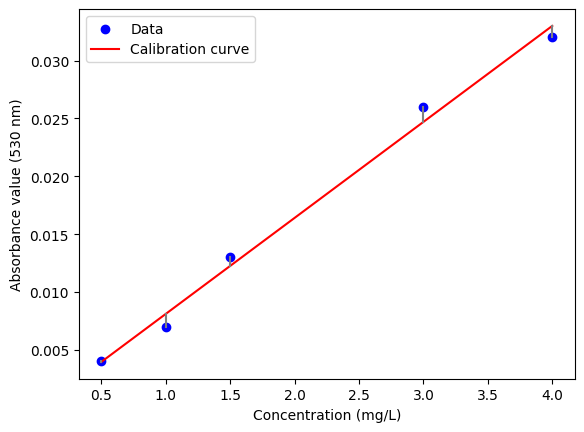

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ols_slope(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    return numerator / denominator

def ols_intercept(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = ols_slope(x, y)
    return y_mean - slope * x_mean

def ols(x, y):
    slope = ols_slope(x, y)
    intercept = ols_intercept(x, y)
    return slope, intercept

# Data
concentration = np.array([0.5, 1.0, 1.5, 3.0, 4.0])
absorbance = np.array([0.004, 0.007, 0.013, 0.026, 0.032])

# # Fit a line to the data
slope, intercept = ols(concentration, absorbance)
line = slope * concentration + intercept

# Plot the calibration curve with the residuals
plt.scatter(concentration, absorbance, color='blue', label='Data')
plt.plot(concentration, line, color='red', label='Calibration curve')
for i in range(len(concentration)):
    plt.plot([concentration[i], concentration[i]], [absorbance[i], line[i]], color='gray')
plt.xlabel('Concentration (mg/L)')
plt.ylabel('Absorbance value (530 nm)')
plt.legend()
plt.show()

In [3]:
# Calculate the residuals
residuals = absorbance - line

# Calculate the sum of the squared residuals
def ssr(residuals):
    return np.sum(residuals ** 2)

# Test the function
print(ssr(residuals))

4.4647058823529414e-06


In [4]:
# Calculate the variance of the residuals
def variance(residuals):
    return ssr(residuals) / (len(residuals) - 2)

# Test the function
print(variance(residuals))

1.488235294117647e-06


In [6]:
# Calculate the standard error of the slope
def se_slope(x, residuals):
    # numerator
    numerator = variance(residuals)
    # denominator
    x_mean = np.mean(x)
    denominator = np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Test the function
print(se_slope(concentration, residuals))

# Calculate the standard error of the intercept
def se_intercept(x, residuals):
    # numerator
    numerator = variance(residuals)
    # denominator
    x_mean = np.mean(x)
    denominator = len(x) * np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Test the function
print(se_intercept(concentration, residuals))

0.0004184333939712645
0.0001871291025951396


In [8]:
# Calculate the confidence interval
from scipy.stats import t

def confidence_interval_slope(x, residuals, confidence_level):
    # Calculate the standard error of the slope
    se = se_slope(x, residuals)

    # Calculate the critical t-value
    n_data_points = len(x)
    df = n_data_points - 2  # degrees of freedom
    alpha = 1 - confidence_level
    critical_t_value = t.ppf(1 - alpha/2, df)

    # Calculate the confidence interval
    return critical_t_value * se

# Calculate the 95% confidence interval for the slope
print(f"slope: {slope:.3f} +/- {confidence_interval_slope(concentration, residuals, 0.95):.3f}")

# Calculate the confidence interval for the intercept
def confidence_interval_intercept(x, residuals, confidence_level):
    # Calculate the standard error of the intercept
    se = se_intercept(x, residuals)

    # Calculate the critical t-value
    n_data_points = len(x)
    df = n_data_points - 2  # degrees of freedom
    alpha = 1 - confidence_level
    critical_t_value = t.ppf(1 - alpha/2, df)

    # Calculate the confidence interval
    return critical_t_value * se

# Calculate the 95% confidence interval for the intercept
print(f"intercept: {intercept:.3f} +/- {confidence_interval_intercept(concentration, residuals, 0.95):.3f}")

slope: 0.008 +/- 0.001
intercept: -0.000 +/- 0.001
